In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 21)
pd.set_option('precision', 2)

df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [2]:
# Show the columns and the index of the dataset
print(df.columns,'\n')
print(df.index,'\n')

# Show the shape of the dataset
print(df.shape,'\n')

# Show information
print(df.info(),'\n')

# Show the dtype of each column
print(df.dtypes,'\n')

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object') 

RangeIndex(start=0, stop=21613, step=1) 

(21613, 21) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  cond

In [3]:
# Remove the following columns: 'id', 'date', 'zipcode', 'lat', 'long'
col = ['id', 'date', 'zipcode', 'lat', 'long']
df.drop(columns = col, axis = 1, inplace = True)

# Check for missing data in the dataset
df.isna().sum()

# Show descriptive statistics of the dataset
df.describe().T


,count,mean,std,min,25%,50%,75%,max
price,21613.0,5.40e+05,367127.20,75000.0,321950.00,450000.00,645000.0,7.70e+06
bedrooms,21613.0,3.37e+00,0.93,0.0,3.00,3.00,4.0,3.30e+01
bathrooms,21613.0,2.11e+00,0.77,0.0,1.75,2.25,2.5,8.00e+00
sqft_living,21613.0,2.08e+03,918.44,290.0,1427.00,1910.00,2550.0,1.35e+04
sqft_lot,21613.0,1.51e+04,41420.51,520.0,5040.00,7618.00,10688.0,1.65e+06
floors,21613.0,1.49e+00,0.54,1.0,1.00,1.50,2.0,3.50e+00
waterfront,21613.0,7.54e-03,0.09,0.0,0.00,0.00,0.0,1.00e+00
view,21613.0,2.34e-01,0.77,0.0,0.00,0.00,0.0,4.00e+00
condition,21613.0,3.41e+00,0.65,1.0,3.00,3.00,4.0,5.00e+00
grade,21613.0,7.66e+00,1.18,1.0,7.00,7.00,8.0,1.30e+01


In [4]:
# Calculate the correlation matrix
corr = df.corr()
print(corr, '\n')

# Calculate the covariance matrix
cov = df.cov()
print(cov, '\n')

               price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price           1.00  3.08e-01       0.53         0.70  8.97e-02  2.57e-01   
bedrooms        0.31  1.00e+00       0.52         0.58  3.17e-02  1.75e-01   
bathrooms       0.53  5.16e-01       1.00         0.75  8.77e-02  5.01e-01   
sqft_living     0.70  5.77e-01       0.75         1.00  1.73e-01  3.54e-01   
sqft_lot        0.09  3.17e-02       0.09         0.17  1.00e+00 -5.20e-03   
floors          0.26  1.75e-01       0.50         0.35 -5.20e-03  1.00e+00   
waterfront      0.27 -6.58e-03       0.06         0.10  2.16e-02  2.37e-02   
view            0.40  7.95e-02       0.19         0.28  7.47e-02  2.94e-02   
condition       0.04  2.85e-02      -0.12        -0.06 -8.96e-03 -2.64e-01   
grade           0.67  3.57e-01       0.66         0.76  1.14e-01  4.58e-01   
sqft_above      0.61  4.78e-01       0.69         0.88  1.84e-01  5.24e-01   
sqft_basement   0.32  3.03e-01       0.28         0.44  1.53e-02

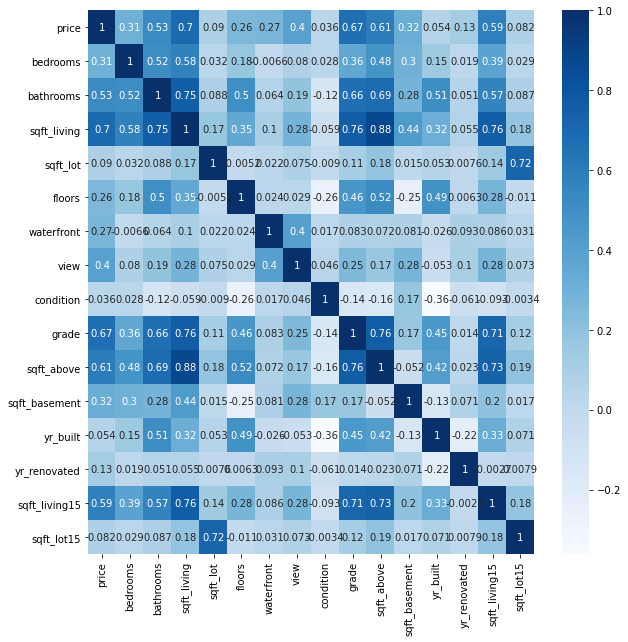

In [5]:
# Make a heat map based on the correlation matrix
plt.figure(figsize = (10, 10))
sns.heatmap(corr, cmap = 'Blues', annot = True);

In [7]:
# Graph the relationships between the dataset variables
# sns.pairplot(df);


In [ ]:
# Define the target variable (column 'price')
# Define the predictor variables

y = df['price']  #set target variable
x = df.drop('price', axis = 1)  #set features of the model

In [ ]:
# Use sklearn's train_test_split function to separate the dataset into training and test data
# Create a linear regression model and adjust to the training data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 33)
model = LinearRegression()
model.fit(x_train, y_train)


In [ ]:
model.score(x_test, y_test)
